In [1]:
import eikon as ek
import pandas as pd

ek.set_app_key('89915a3b58874e1599870c6ecc45d6edd6344f8c')

In [2]:
#ek.get_news_headlines('R:LHAG.DE', date_from='2019-03-06T09:00:00', date_to='2019-03-06T18:00:00')

In [5]:
#headlines = ek.get_news_headlines('EU AND POL',1)
#story_id = headlines.iat[0,2]
#ek.get_news_story(story_id)

In [2]:
df = ek.get_timeseries(["MSFT.O"], 
                       start_date="1000-01-01",  
                       end_date="2023-01-01",
                       interval='daily')
df

MSFT.O,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME
Date,,,,,,
2011-02-01,28.06,27.9925,27.61,27.8,<NA>,62810661
2011-02-02,28.11,27.94,27.88,27.93,<NA>,45836488
2011-02-03,27.97,27.65,27.54,27.965,<NA>,60340059
2011-02-04,27.84,27.77,27.51,27.7,<NA>,40416627
2011-02-07,28.34,28.1975,27.79,27.8,<NA>,68980871
...,...,...,...,...,...,...
2022-12-23,238.87,238.73,233.9428,236.11,258172,21206982
2022-12-27,238.93,236.96,235.83,238.7,226696,16688648
2022-12-28,239.72,234.53,234.17,236.89,215793,17457104


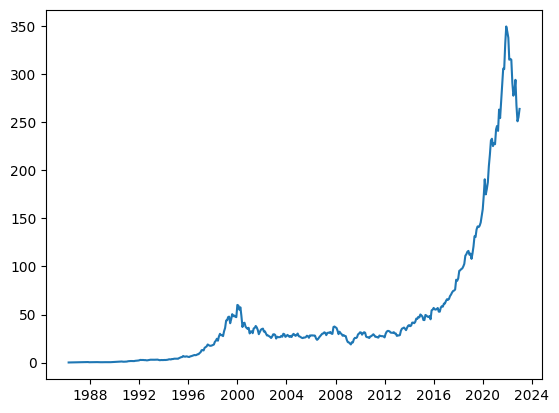

In [28]:
import matplotlib.pyplot as plt

plt.plot(df.HIGH)

In [2]:
df, err = ek.get_data(['GOOG.O','MSFT.O', 'FB.O'], 
                      [ 'TR.Revenue','TR.GrossProfit'])
df

,Instrument,Revenue,Gross Profit
0,GOOG.O,257637000000,146698000000
1,MSFT.O,198270000000,135620000000
2,FB.O,117929000000,95280000000


In [16]:
df1, err = ek.get_data('MUVGn.DE','TR.GrossProfit',)

In [17]:
df1

,Instrument,Gross Profit
0,MUVGn.DE,<NA>


In [33]:
df, err = ek.get_data('US240421348=', ['TR.BIDYIELD', 'TR.MIDYIELD', 'TR.ASKYIELD', 'TR.BIDYIELD.date'], {'SDate':'0', 'EDate':'-20', 'Frq': 'M', 'Points': 20})

In [34]:
df

,Instrument,Bid Yield,Mid Yield,Ask Yield,Date
0,US240421348=,3.304,3.29,3.279,2022-12-30T00:00:00Z
1,US240421348=,2.607,2.6,2.583,2022-11-30T00:00:00Z
2,US240421348=,3.119,3.11,3.094,2022-10-31T00:00:00Z
3,US240421348=,3.315,3.3,3.29,2022-09-30T00:00:00Z
4,US240421348=,2.548,2.54,2.523,2022-08-31T00:00:00Z
5,US240421348=,1.472,1.45,1.419,2022-07-29T00:00:00Z
6,US240421348=,2.53,2.52,2.505,2022-06-30T00:00:00Z
7,US240421348=,1.984,1.97,1.959,2022-05-31T00:00:00Z
8,US240421348=,1.678,1.67,1.653,2022-04-29T00:00:00Z
9,US240421348=,1.147,1.13,1.122,2022-03-31T00:00:00Z


In [4]:
df, err = ek.get_data('US240421348=', 'TR.BIDYIELD(SDate=-2,EDate=0,Frq=D,Points=0)')
df

,Instrument,Bid Yield
0,US240421348=,2.826


In [16]:
df, err = ek.get_data(['0#.STOXX'], 
                    ['TR.ISIN'], 
                    {'SDate':'20230101'})


In [20]:
eikon_isin_list = df['ISIN'].to_list()

In [21]:
excel_path = r"Z:\Interés Departamental\Model Portfolio\Hugo\Ranking DIP European Equities\200 acciones con historia filtradas por market cap.xlsx"
excel_isin_list = pd.read_excel(excel_path)['ID_ISIN.1'].to_list()

In [22]:
eikon_isin_list.sort() == excel_isin_list.sort()

True

In [29]:
PriceClose_df,err = ek.get_data(eikon_isin_list[0], fields=['TR.PriceClose','TR.PriceClose.date'], parameters={'SDate':'20000101','EDate':'20230101', 'Frq':'CM','Curn':'Native'})
PriceClose_df

,Instrument,Price Close,Date
0,AT0000652011,10.055552,2000-01-31T00:00:00Z
1,AT0000652011,10.52494,2000-02-29T00:00:00Z
2,AT0000652011,10.887869,2000-03-31T00:00:00Z
3,AT0000652011,10.936259,2000-04-28T00:00:00Z
4,AT0000652011,10.645916,2000-05-31T00:00:00Z
...,...,...,...
271,AT0000652011,22.48,2022-08-31T00:00:00Z
272,AT0000652011,22.64,2022-09-30T00:00:00Z
273,AT0000652011,24.96,2022-10-31T00:00:00Z
274,AT0000652011,29.6,2022-11-30T00:00:00Z
